In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
%matplotlib inline

In [2]:
os.chdir('/home/mike/PycharmProjects/WiFinder/Data/final_csvs')

df = pd.read_csv('ABT.csv')

,Room_Capacity,Module,Registered_Students,Hour,Date,Room,Occupancy,Avg_Count_60min,Avg_Count_30min,Avg_Adj_Count_60min,Avg_Adj_Count_30min
0,90,Vacant,-1,9,2015-11-03,B002,0.0,4.750000,2.000000,0.052778,0.022222
1,90,COMP30110,45,10,2015-11-03,B002,0.5,29.272727,29.000000,0.325253,0.322222
2,90,COMP30260,18,11,2015-11-03,B002,0.5,28.727273,27.250000,0.319192,0.302778
3,90,COMP40370,27,12,2015-11-03,B002,0.5,14.166667,10.000000,0.157407,0.111111
4,90,Vacant,-1,13,2015-11-03,B002,0.0,14.250000,13.333333,0.158333,0.148148



    Deriving features:

    Occupancy count * Room Capacity: To give approximate number of students in classroom



In [4]:
# create new feature:
# proportion of associated count connections to room capacity

df['Room_Survey_Headcount_Estimate'] = 0.0

for row in range(df.shape[0]):
    survey = df.columns.get_loc('Occupancy')
    room_cap = df.columns.get_loc('Room_Capacity')
    headcount_col = df.columns.get_loc('Room_Survey_Headcount_Estimate')

    headcount_estimate = (df.iat[row, survey] * df.iat[row, room_cap])
    df.iat[row, headcount_col] = headcount_estimate

                    
                                         Linear Regressions 1
                                          
                                          Predict: Occupancy
                                          
                                          
                                              Features:
                                              
                                      Average Count over 60 minutes
                                      Average Count over 30 minutes
                                 Adjusted Average Count over 60 minutes
                                 Adjusted Average Count over 30 minutes
                                          

In [5]:
lm = sm.ols(formula="Occupancy ~ Avg_Count_60min", data=df).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Occupancy   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     118.6
Date:                Fri, 29 Jul 2016   Prob (F-statistic):           2.96e-22
Time:                        13:38:47   Log-Likelihood:                 70.305
No. Observations:                 216   AIC:                            -136.6
Df Residuals:                     214   BIC:                            -129.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.1040      0.018     

In [6]:
lm = sm.ols(formula="Occupancy ~ Avg_Count_30min", data=df).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Occupancy   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     120.3
Date:                Fri, 29 Jul 2016   Prob (F-statistic):           1.67e-22
Time:                        13:38:47   Log-Likelihood:                 70.878
No. Observations:                 216   AIC:                            -137.8
Df Residuals:                     214   BIC:                            -131.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.1145      0.017     

In [7]:
lm = sm.ols(formula="Occupancy ~ Avg_Adj_Count_60min", data=df).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Occupancy   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     184.2
Date:                Fri, 29 Jul 2016   Prob (F-statistic):           1.10e-30
Time:                        13:38:47   Log-Likelihood:                 89.766
No. Observations:                 216   AIC:                            -175.5
Df Residuals:                     214   BIC:                            -168.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               0.0580    

In [8]:
lm = sm.ols(formula="Occupancy ~ Avg_Adj_Count_30min", data=df).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Occupancy   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     199.9
Date:                Fri, 29 Jul 2016   Prob (F-statistic):           1.75e-32
Time:                        13:38:47   Log-Likelihood:                 93.926
No. Observations:                 216   AIC:                            -183.9
Df Residuals:                     214   BIC:                            -177.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               0.0657    

                    
                                         Linear Regressions 2
                                         
                            Adjusted30min is the highest scoring on Occupancy.

                                          Predict: Occupancy
                                          
                                              Features:
                                              
                                      Average Count over 60 minutes
                                      Average Count over 30 minutes
                                 Adjusted Average Count over 60 minutes
                                 Adjusted Average Count over 30 minutes
                                                                 

In [9]:
lm = sm.ols(formula="Room_Survey_Headcount_Estimate ~ Avg_Count_60min", data=df).fit()

print(lm.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Room_Survey_Headcount_Estimate   R-squared:                       0.554
Model:                                        OLS   Adj. R-squared:                  0.552
Method:                             Least Squares   F-statistic:                     265.6
Date:                            Fri, 29 Jul 2016   Prob (F-statistic):           2.29e-39
Time:                                    13:38:47   Log-Likelihood:                -984.63
No. Observations:                             216   AIC:                             1973.
Df Residuals:                                 214   BIC:                             1980.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
------

In [10]:
lm = sm.ols(formula="Room_Survey_Headcount_Estimate ~ Avg_Count_30min", data=df).fit()

print(lm.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Room_Survey_Headcount_Estimate   R-squared:                       0.586
Model:                                        OLS   Adj. R-squared:                  0.584
Method:                             Least Squares   F-statistic:                     303.4
Date:                            Fri, 29 Jul 2016   Prob (F-statistic):           6.74e-43
Time:                                    13:38:47   Log-Likelihood:                -976.45
No. Observations:                             216   AIC:                             1957.
Df Residuals:                                 214   BIC:                             1964.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
------

In [11]:
lm = sm.ols(formula="Room_Survey_Headcount_Estimate ~ Avg_Adj_Count_60min", data=df).fit()

print(lm.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Room_Survey_Headcount_Estimate   R-squared:                       0.236
Model:                                        OLS   Adj. R-squared:                  0.232
Method:                             Least Squares   F-statistic:                     66.07
Date:                            Fri, 29 Jul 2016   Prob (F-statistic):           3.47e-14
Time:                                    13:38:47   Log-Likelihood:                -1042.7
No. Observations:                             216   AIC:                             2089.
Df Residuals:                                 214   BIC:                             2096.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
--

In [12]:
lm = sm.ols(formula="Room_Survey_Headcount_Estimate ~ Avg_Adj_Count_30min", data=df).fit()

print(lm.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Room_Survey_Headcount_Estimate   R-squared:                       0.282
Model:                                        OLS   Adj. R-squared:                  0.278
Method:                             Least Squares   F-statistic:                     83.88
Date:                            Fri, 29 Jul 2016   Prob (F-statistic):           4.35e-17
Time:                                    13:38:47   Log-Likelihood:                -1036.1
No. Observations:                             216   AIC:                             2076.
Df Residuals:                                 214   BIC:                             2083.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
--

    
                                             Linear Results 3:
                                     
                        Adjusted30min is the highest scoring on occupancy.
                        Avg30min is the highest scoring on headcount_estimate.
                              
                       Next, we attempt normalisation to deal with outliers.
                       We repeat the previous two winning regressions from each step.
                       

In [13]:
df_norm = df

In [14]:
df_norm['Norm_Avg_Adj_Count_30min'] = df_norm['Avg_Adj_Count_30min']
df_norm['Norm_Avg_Count_30min'] = df_norm['Avg_Count_30min']

In [15]:
cols_to_norm = ['Norm_Avg_Count_30min', 'Norm_Avg_Adj_Count_30min']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [17]:
# OLS with normalised adjusted 30minute count, predicting occupancy

lm = sm.ols(formula="Occupancy ~ Norm_Avg_Adj_Count_30min", data=df).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              Occupancy   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     199.9
Date:                Fri, 29 Jul 2016   Prob (F-statistic):           1.75e-32
Time:                        13:38:47   Log-Likelihood:                 93.926
No. Observations:                 216   AIC:                            -183.9
Df Residuals:                     214   BIC:                            -177.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [18]:
# OLS with normalised 30minute count, predicting headcount

lm = sm.ols(formula="Room_Survey_Headcount_Estimate ~ Norm_Avg_Count_30min", data=df).fit()

print(lm.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Room_Survey_Headcount_Estimate   R-squared:                       0.586
Model:                                        OLS   Adj. R-squared:                  0.584
Method:                             Least Squares   F-statistic:                     303.4
Date:                            Fri, 29 Jul 2016   Prob (F-statistic):           6.74e-43
Time:                                    13:38:47   Log-Likelihood:                -976.45
No. Observations:                             216   AIC:                             1957.
Df Residuals:                                 214   BIC:                             1964.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
-

In [19]:
test_residuals = lm.resid

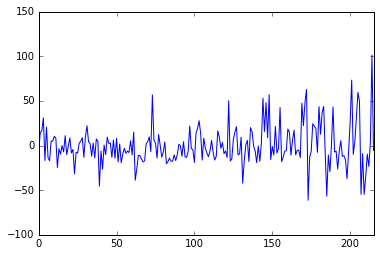

In [22]:
# plot residuals

lm.resid.plot()

In [ ]:
# residuals are significantly peaked, especially at the higher end of the occupancy scale

test fitting residual series to model and then removing >3 sd instances and replotting residuals.

In [55]:
test_residuals = df

In [27]:
# plot best model - predict headcount from 30min average associated count

lm = sm.ols(formula="Room_Survey_Headcount_Estimate ~ Norm_Avg_Count_30min", data=test_residuals).fit()

print(lm.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Room_Survey_Headcount_Estimate   R-squared:                       0.586
Model:                                        OLS   Adj. R-squared:                  0.584
Method:                             Least Squares   F-statistic:                     303.4
Date:                            Fri, 29 Jul 2016   Prob (F-statistic):           6.74e-43
Time:                                    13:53:53   Log-Likelihood:                -976.45
No. Observations:                             216   AIC:                             1957.
Df Residuals:                                 214   BIC:                             1964.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
-

In [28]:
# get the residual series

lm.resid

0       -7.009762
1       14.632647
2       16.146565
3       31.069471
4      -16.814183
5       20.695823
6      -13.750006
7      -17.037370
8        5.109087
9        4.964904
10      10.299663
11       8.360701
12     -24.600047
13      -3.686056
14      -9.749232
15      -0.081489
16      -7.153944
17      11.028080
18     -10.174276
19      -0.773566
20       8.569471
21      -8.299901
22      -4.399465
23     -31.751507
24      -7.528819
25      -8.307406
26       2.513799
27       4.820721
28       8.742490
29     -13.202112
          ...    
186    -10.547923
187    -29.291669
188      0.842507
189     43.298616
190     -7.202885
191     -6.288848
192    -26.330238
193     -6.490704
194      5.456353
195    -12.133932
196    -11.479424
197    -16.006760
198    -37.115102
199     -7.153944
200     25.996696
201     73.230937
202     -9.971192
203      4.447074
204     30.754724
205     59.562420
206     49.432065
207    -54.734223
208     -9.028319
209    -54.734223
210    -34

In [29]:
# add to df as a new column

test_residuals['residuals'] = lm.resid

In [161]:
# remove those values outside of 1.5 standard deviations from the mean residual
# this removes 26 observations

df_3std = test_residuals[((test_residuals.residuals - test_residuals.residuals.mean()) / test_residuals.residuals.std()).abs() < 1.5]

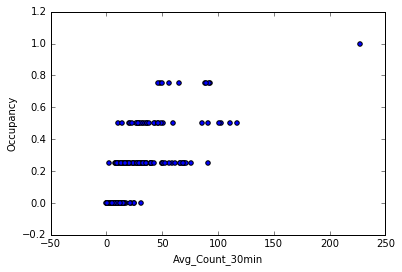

In [162]:
# visualise changes

df_3std.plot(kind='scatter', x='Avg_Count_30min', y='Occupancy');

In [164]:
# refit model without the possible outliers
# r^2 is significantly improved

lm = sm.ols(formula="Room_Survey_Headcount_Estimate ~ Avg_Count_30min", data=df_3std).fit()

print(lm.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Room_Survey_Headcount_Estimate   R-squared:                       0.815
Model:                                        OLS   Adj. R-squared:                  0.814
Method:                             Least Squares   F-statistic:                     830.4
Date:                            Fri, 29 Jul 2016   Prob (F-statistic):           6.84e-71
Time:                                    14:46:19   Log-Likelihood:                -752.66
No. Observations:                             190   AIC:                             1509.
Df Residuals:                                 188   BIC:                             1516.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
------

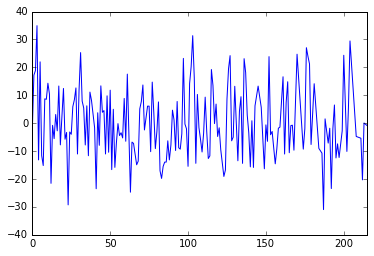

In [165]:
# replot the residuals - there is now no significant peaking and the residuals are much more stable

lm.resid.plot()


            Create functions that will perform this regression in the working environment

In [166]:
linear_estimate_headcount = lm

In [185]:
def prep_predictor_value(query_result):
    """Wraps a SINGLE value in a pd.DataFrame to prepare it for a StatsModels Linear Regression object
    
    Avg_Count_30min is the name the model was trained to predict on."""
    
    predictor_value = pd.DataFrame({'Avg_Count_30min': [query_result]})
    
    return predictor_value

In [195]:
def linear_prediction(predictor_value):
    """Performs a prediction on a supplied dataframe object and returns the result"""
    
    result = linear_estimate_headcount.predict(predictor_value)
    
    result = int(result)
    
    return result

In [196]:
def estimate_occupancy_number(query_result):
    
    predictor_value = prep_predictor_value(query_result)
    
    occupancy_estimate = linear_prediction(predictor_value)
    
    return occupancy_estimate

In [224]:
def prep_predictor_values(*query_results):
    """Wraps MULTIPLE values in a pd.DataFrame to prepare it for a StatsModels Linear Regression object
    
    Avg_Count_30min is the name the model was trained to predict on."""
    
    query_list = []
    for result in query_results:
        query_list.append(result)
    
    predictor_value = pd.DataFrame({'Avg_Count_30min': query_list})
    
    return predictor_value

In [221]:
def linear_predictions(predictor_values):
    """Performs a prediction on a supplied dataframe object and returns the result"""
    
    result = linear_estimate_headcount.predict(predictor_values)
    
    list(result)
    result = [int(x) for x in result]
    
    return result

In [222]:
def estimate_occupancy_numbers(*query_results):
    """THROWS ERROR - no dtypes ; no idea why"""
    
    predictor_values = prep_predictor_values(query_results)
    
    occupancy_estimates = linear_predictions(predictor_values)
    
    return occupancy_estimates